In [1]:
import bw2data as bd
import bw2io as bi
import bw2calc as bc
from ulcarchetype.utils import get_cf_info,minmax_archetype,cf_add_uncertainty
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# or instead use an existing project with the biosphere3 database and
# standard impact assessment methods
bd.projects.set_current('bw25')

In [3]:
bi.bw2setup()

Biosphere database already present!!! No setup is needed


as example lets use a method with not many characterisation factors

In [4]:
method = ('EF v3.0',
 'human toxicity: non-carcinogenic, organics',
 'comparative toxic unit for human (CTUh)')

In [5]:
assert method in bd.methods

## get_cf_info

In [6]:
cf_df = get_cf_info(method)
cf_df

,database,code,name,amount,unit,type,compartment,subcompartment
0,biosphere3,77db8bd1-5a69-465c-b51f-7b27fbb574a5,"1,2-Dichlorobenzene",2.369400e-08,kilogram,emission,air,lower stratosphere + upper troposphere
1,biosphere3,06a42317-47bd-481d-b5ce-e091843497c6,"1,2-Dichlorobenzene",2.369400e-08,kilogram,emission,air,non-urban air or from high stacks
2,biosphere3,b1c36287-329c-49f0-93c2-68246d34007c,"1,2-Dichlorobenzene",4.165200e-08,kilogram,emission,air,None
3,biosphere3,9645e02f-855a-4b9f-8baf-f34a08fa80c4,"1,2-Dichlorobenzene",5.961000e-08,kilogram,emission,air,urban air close to ground
4,biosphere3,59af2a59-f4ed-43a0-b5ab-887de45b9571,"1,2-Dichlorobenzene",3.555500e-07,kilogram,emission,water,ground-
...,...,...,...,...,...,...,...,...
1592,biosphere3,0f3a98cd-b692-4801-86b5-b2222a953417,t-Butyl methyl ether,4.705400e-08,kilogram,emission,water,ground-
1593,biosphere3,c5b4869c-f131-4a8c-911f-f252cafb2e30,t-Butyl methyl ether,1.378900e-10,kilogram,emission,water,ocean
1594,biosphere3,77fd3c56-5c3e-4070-93fa-de03fa455d47,t-Butyl methyl ether,4.705400e-08,kilogram,emission,water,surface water
1595,biosphere3,3d59d864-b6c3-4315-ab21-2c2ba2119ad1,t-Butyl methyl ether,2.359600e-08,kilogram,emission,water,None


## minmax_archetype

In [7]:
minmax_archetype(cf_df)

,code,name,amount,minimum,maximum,compartment
0,"(biosphere3, b1c36287-329c-49f0-93c2-68246d340...","1,2-Dichlorobenzene",4.165200e-08,2.369400e-08,5.961000e-08,air
1,"(biosphere3, 67070d27-426e-43e9-98e8-309952f78...","1,2-Dichlorobenzene",2.231600e-07,9.076500e-08,3.555500e-07,water
2,"(biosphere3, 048baf1e-6cdc-44a5-92e2-32d15ff54...",1-Pentanol,3.323500e-08,3.579800e-09,6.289000e-08,air
3,"(biosphere3, 070dc6b3-0976-45a0-803e-0a87d7e96...",1-Pentanol,3.727400e-09,7.726900e-11,7.377500e-09,water
12,"(biosphere3, 47bee45d-6d2b-48a6-a0c8-fcb8debc7...",2-Methyl-1-propanol,1.504400e-09,9.821500e-10,2.026600e-09,air
...,...,...,...,...,...,...
737,"(biosphere3, f9f12076-1cdf-4a3d-a70d-eab640038...",o-Nitrotoluene,9.750900e-07,2.914700e-07,1.658700e-06,air
738,"(biosphere3, 527d6cb5-bbd7-403d-8dcc-b6678fb12...",o-Xylene,6.495700e-08,6.073100e-09,1.238400e-07,air
739,"(biosphere3, 1b279330-0469-4d04-9fe2-4e9a38011...",o-Xylene,6.889700e-09,9.287000e-10,1.285100e-08,water
740,"(biosphere3, beb69352-568e-4a33-b9d4-3b5bfafc8...",t-Butyl methyl ether,3.114300e-09,8.883600e-10,5.340200e-09,air


## cf_add_uncertainty

In [8]:
cfs = cf_add_uncertainty(method,uncertainty_type=4)

In [9]:
len(cfs)

1597

the result is a list of characterisation factors in the format needed to create a brightway2 method.

In [10]:
len(bd.Method(method).load())

1597

some of these are uncertain, they can be distinguished because their value is not a variable of type float but a dict

In [11]:
[(key,cfvalue) for key,cfvalue in cfs if isinstance(cfvalue,float)==False]

[(('biosphere3', 'b1c36287-329c-49f0-93c2-68246d34007c'),
  {'amount': 4.1652e-08,
   'maximum': 5.961e-08,
   'minimum': 2.3694e-08,
   'uncertainty type': 4}),
 (('biosphere3', '67070d27-426e-43e9-98e8-309952f78140'),
  {'amount': 2.2316e-07,
   'maximum': 3.5555e-07,
   'minimum': 9.0765e-08,
   'uncertainty type': 4}),
 (('biosphere3', '048baf1e-6cdc-44a5-92e2-32d15ff54885'),
  {'amount': 3.3235e-08,
   'maximum': 6.289e-08,
   'minimum': 3.5798e-09,
   'uncertainty type': 4}),
 (('biosphere3', '070dc6b3-0976-45a0-803e-0a87d7e96959'),
  {'amount': 3.7274e-09,
   'maximum': 7.3775e-09,
   'minimum': 7.7269e-11,
   'uncertainty type': 4}),
 (('biosphere3', '47bee45d-6d2b-48a6-a0c8-fcb8debc7f5d'),
  {'amount': 1.5044e-09,
   'maximum': 2.0266e-09,
   'minimum': 9.8215e-10,
   'uncertainty type': 4}),
 (('biosphere3', '446e7a93-6ac4-4bdf-b97d-03f683c7488c'),
  {'amount': 9.9659e-09,
   'maximum': 1.9908e-08,
   'minimum': 2.3996e-11,
   'uncertainty type': 4}),
 (('biosphere3', '4e4463

# Example with ficticious method

In [12]:
e1 = ('biosphere3', '051aaf7a-6c1a-4e86-999f-85d5f0830df6')
e2 = ('biosphere3', 'ddd99a3a-be86-423d-b36a-a9dc8af1b1f8')
e3 = ('biosphere3', '66f50b33-fd62-4fdd-a373-c5b0de7de00d')
e4 = ('biosphere3', '21e46cb8-6233-4c99-bac3-c41d2ab99498')
e5 = ('biosphere3', '230d8a0a-517c-43fe-8357-1818dd12997a')

nox_lowpop = ('biosphere3', '9115356e-a534-4329-9ec6-d9208720241b')
nox_urban = ('biosphere3', 'd068f3e2-b033-417b-a359-ca4f25da9731')
nox_unspecified = ('biosphere3', 'c1b91234-6f24-417b-8309-46111d09c457')
nox_lower_stratosfphere = ('biosphere3', '4841a0fe-c250-4a39-94a1-1bc31426c0f1')

In [13]:
for e in [e1,e2,e3,e4,e5,nox_lowpop,nox_urban,nox_unspecified,nox_lower_stratosfphere]:
    emission = bd.get_activity(tuple(e))
    print(emission)

'Particulate Matter, < 2.5 um' (kilogram, None, ('air', 'low population density, long-term'))
'Particulate Matter, < 2.5 um' (kilogram, None, ('air', 'lower stratosphere + upper troposphere'))
'Particulate Matter, < 2.5 um' (kilogram, None, ('air', 'non-urban air or from high stacks'))
'Particulate Matter, < 2.5 um' (kilogram, None, ('air',))
'Particulate Matter, < 2.5 um' (kilogram, None, ('air', 'urban air close to ground'))
'Nitrogen oxides' (kilogram, None, ('air', 'low population density, long-term'))
'Nitrogen oxides' (kilogram, None, ('air', 'urban air close to ground'))
'Nitrogen oxides' (kilogram, None, ('air',))
'Nitrogen oxides' (kilogram, None, ('air', 'lower stratosphere + upper troposphere'))


## 1 unspecified flow

In [14]:
cfs=[(e1,1),
     (e2,1),
     (e3,1),
     (e4,10),#unspecified
     (e5,10),
     (nox_lowpop,0.5),
     (nox_urban,5),
     (nox_lower_stratosfphere,0.1),
     (nox_unspecified,5) # unspecified
     ]

test_method_name_1=('test method','1 unspecified')

test_method_1=bd.Method(test_method_name_1)

metadata_test_method={'description':'method to test uncertainty on archetype',
                      'unit':'DALY'}

test_method_1.register(**metadata_test_method)

In [15]:
test_method_1.write(cfs)

In [16]:
test_method_1.process()

In [17]:
assert ('test method','1 unspecified') in bd.methods

In [18]:
M = bd.Method(('test method','1 unspecified'))

In [21]:
M.datapackage().filter_by_attribute('matrix','characterization_matrix').filter_by_attribute("kind", "indices").resources

[{'profile': 'data-resource',
  'format': 'npy',
  'mediatype': 'application/octet-stream',
  'name': 'test_method_1_unspecified_matrix_data.indices',
  'matrix': 'characterization_matrix',
  'kind': 'indices',
  'path': 'test_method_1_unspecified_matrix_data.indices.npy',
  'group': 'test_method_1_unspecified_matrix_data',
  'nrows': 9,
  'global_index': 1,
  'identifier': ['test method', '1 unspecified'],
  'category': 'vector'}]

create uncertain version.

In [17]:
cf_add_uncertainty(test_method_name_1,uncertainty_type=4)

[(('biosphere3', '051aaf7a-6c1a-4e86-999f-85d5f0830df6'), 1.0),
 (('biosphere3', 'ddd99a3a-be86-423d-b36a-a9dc8af1b1f8'), 1.0),
 (('biosphere3', '66f50b33-fd62-4fdd-a373-c5b0de7de00d'), 1.0),
 (('biosphere3', '230d8a0a-517c-43fe-8357-1818dd12997a'), 10.0),
 (('biosphere3', '9115356e-a534-4329-9ec6-d9208720241b'), 0.5),
 (('biosphere3', 'd068f3e2-b033-417b-a359-ca4f25da9731'), 5.0),
 (('biosphere3', '4841a0fe-c250-4a39-94a1-1bc31426c0f1'), 0.1),
 (('biosphere3', 'c1b91234-6f24-417b-8309-46111d09c457'),
  {'amount': 5.0, 'maximum': 5.0, 'minimum': 0.1, 'uncertainty type': 4}),
 (('biosphere3', '21e46cb8-6233-4c99-bac3-c41d2ab99498'),
  {'amount': 10.0, 'maximum': 10.0, 'minimum': 1.0, 'uncertainty type': 4})]

In [18]:
# uncertain uniform
cfs_uniform_t1=cf_add_uncertainty(test_method_name_1,uncertainty_type=4)
new_method_name=('test method','1 unspecified','uncertain','uniform')
metadata=bd.Method(test_method_name_1).metadata
new_method=bd.Method(new_method_name)
new_method.register(**metadata)

In [19]:
new_method.write(cfs_uniform_t1)

In [20]:
# uncertain triangular
cfs_triangular_t1=cf_add_uncertainty(test_method_name_1,uncertainty_type=5)
new_method_name=('test method','1 unspecified','uncertain','triangular')
metadata=bd.Method(test_method_name_1).metadata
new_method=bd.Method(new_method_name)
new_method.register(**metadata)

In [21]:
new_method.write(cfs_triangular_t1)

In [22]:
assert bd.Method(('test method','1 unspecified','uncertain','uniform')).load() == cf_add_uncertainty(('test method','1 unspecified'))

some validations

In [23]:
#data type
assert pd.api.types.is_numeric_dtype(get_cf_info(('test method','1 unspecified')).amount)

In [24]:
# there is just two uncertain flow
assert len(minmax_archetype(get_cf_info(('test method','1 unspecified'))))==2

In [25]:
#test the fields 
cfs_uncertain=[cf for k,cf in cf_add_uncertainty(('test method','1 unspecified')) if isinstance(cf,dict)]

for cf in cfs_uncertain:
    assert 'amount' in cf
    assert 'minimum' in cf
    assert 'maximum' in cf
    assert 'uncertainty type' in cf

## 0 unnespecified flows

In [26]:
cfs=[(e1,1),
 (e2,1),
 (e3,1),
 #(e4,10),#unspecified
 (e5,10)]

test_method_name_2=('test method','0 unspecified')

test_method_2=bd.Method(test_method_name_2)

metadata_test_method_2={'description':'method to test uncertainty on archetype',
 'unit':'DALY'}

test_method_2.register(**metadata_test_method_2)

test_method_2.write(cfs)

In [27]:
get_cf_info(('test method','0 unspecified'))

,database,code,name,amount,unit,type,compartment,subcompartment
0,biosphere3,051aaf7a-6c1a-4e86-999f-85d5f0830df6,"Particulate Matter, < 2.5 um",1,kilogram,emission,air,"low population density, long-term"
1,biosphere3,ddd99a3a-be86-423d-b36a-a9dc8af1b1f8,"Particulate Matter, < 2.5 um",1,kilogram,emission,air,lower stratosphere + upper troposphere
2,biosphere3,66f50b33-fd62-4fdd-a373-c5b0de7de00d,"Particulate Matter, < 2.5 um",1,kilogram,emission,air,non-urban air or from high stacks
3,biosphere3,230d8a0a-517c-43fe-8357-1818dd12997a,"Particulate Matter, < 2.5 um",10,kilogram,emission,air,urban air close to ground


In [28]:
minmax_archetype(get_cf_info(test_method_name_2))

In [29]:
cf_add_uncertainty(('test method','0 unspecified'))

## 1 flow only, and unspecified

In [30]:
cfs=[
 #(e1,1),
 #(e2,1),
 #(e3,1),
 (e4,10),#unspecified
 #(e5,10)
]

test_method_name_3=('test method','1 only unspecified')

test_method_3=bd.Method(test_method_name_3)

metadata_test_method_3={'description':'method to test uncertainty on archetype',
 'unit':'DALY'}

test_method_3.register(**metadata_test_method_3)

test_method_3.write(cfs)

In [31]:
cf_df = get_cf_info(('test method','1 only unspecified'))

In [32]:
cf_df

,database,code,name,amount,unit,type,compartment,subcompartment
0,biosphere3,21e46cb8-6233-4c99-bac3-c41d2ab99498,"Particulate Matter, < 2.5 um",10,kilogram,emission,air,None


In [33]:
assert cf_add_uncertainty(('test method','1 only unspecified')) is None

## create product system example

create a very simple product system for validation purposes

activity 1

In [34]:
act1_key=('test_db','activity_1')

In [35]:
# a unique emission of PM in an uncertain archetype
biosphere_exchange_1={'amount':1,
                    'input':e4,
                    'output':act1_key,
                    'type':'biosphere',
                    'uncertainty type': 0}

In [36]:
production_exchange_1={'amount':1,
                     'input':act1_key,
                     'output':act1_key,
                     'type':'production',
                     'uncertainty type':0}

In [37]:
act_1_dict={'name':'test_activity_1',
 'unit':'megajoule',
 'location':'GLO',
 'exchanges':[production_exchange_1,biosphere_exchange_1]}

In [38]:
#act1_data={act1_key:act_1_dict}

activity 2

In [39]:
act2_key=('test_db','activity_2')

In [40]:
production_exchange_2={'amount':1,
                     'input':act2_key,
                     'output':act2_key,
                     'type':'production',
                     'uncertainty type':0}

In [41]:
technosphere_exchange_1={
    'amount':10, # or negative?
    'input':act1_key,
    'output':act2_key,
    'type':'technosphere',
    'uncertainty type':3,
    'loc':10,
    'scale':1,
}

In [42]:
act_2_dict={'name':'test_activity_2',
            'location':'GLO',
            'unit':'megajoule','exchanges':[production_exchange_2,technosphere_exchange_1]}

In [43]:
#act2_data={act2_key:act_2_dict}

In [44]:
database_dict={act1_key:act_1_dict,
               act2_key:act_2_dict}

In [45]:
db=bd.Database('test_db')

In [46]:
db.write(database_dict)

100%|██████████| 2/2 [00:00<00:00, 2007.80it/s]

Vacuuming database 


## simplest test

In [47]:
act2 = db.get(code='activity_2')

In [48]:
lca=bc.LCA({act2:1},('test method','1 unspecified'))

In [49]:
lca.lci()
lca.lcia()
lca.score

100.0

In [50]:
lca.technosphere_matrix.toarray()

array([[  1., -10.],
       [  0.,   1.]])

In [51]:
ainv=np.linalg.inv(lca.technosphere_matrix.toarray())

In [52]:
(lca.biosphere_matrix.toarray()).dot((ainv.dot(np.eye(2))).T)

array([[1., 0.]])

In [53]:
lca.demand_array

array([0., 1.])

In [54]:
lca.biosphere_matrix.toarray()

array([[1., 0.]])

In [55]:
lca.supply_array

array([10.,  1.])

In [56]:
lca.demand

{4720: 1}

In [57]:
lca.switch_method(method=('test method','1 unspecified','uncertain','uniform'))

In [58]:
lca.redo_lcia(demand={act2.id:1})

In [59]:
lca.score

100.0

uniform

In [60]:
mc_uncertain_u = bc.LCA(demand={act2:1},
       method=('test method','1 unspecified','uncertain','uniform'),
       use_distributions=True,
       )
mc_uncertain_u.lci()
mc_uncertain_u.lcia()

results_uncertain_u = []
for _ in range(10000):
    next(mc_uncertain_u)
    results_uncertain_u.append(mc_uncertain_u.score)



In [61]:
mc_uncertain_t = bc.LCA(demand={act2:1},
       method=('test method','1 unspecified','uncertain','triangular'),
       use_distributions=True
       )
mc_uncertain_t.lci()
mc_uncertain_t.lcia()

results_uncertain_t = []
for _ in range(10000):
    next(mc_uncertain_t)
    results_uncertain_t.append(mc_uncertain_t.score)

reference

In [62]:
mc_reference = bc.LCA(demand={act2:1},
       method=('test method','1 unspecified'),
       use_distributions=True
       )
mc_reference.lci()
mc_reference.lcia()

results_reference = []
for _ in range(10000):
    next(mc_reference)
    results_reference.append(mc_reference.score)

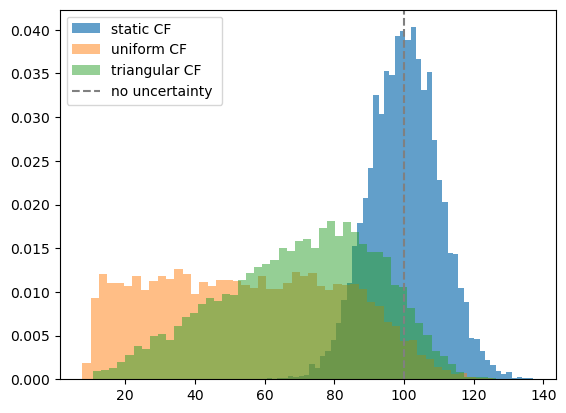

In [63]:
plt.hist(results_reference,density=True,alpha=0.7,label='static CF',bins=50);
plt.hist(results_uncertain_u,density=True,alpha=0.5,label='uniform CF',bins=50);
plt.hist(results_uncertain_t,density=True,alpha=0.5,label='triangular CF',bins=50);
plt.axvline(lca.score,ls='--',color='gray',label='no uncertainty ')
plt.legend();

In [64]:
lca.score

100.0

the version with without uncertainty in cfs only has the uncertainty of the inventory. Adding uncertainty in cfs increases the uncertainty of the total scores, and this uncertainty is higher for the uniform distribution, since it implies we know "less" about the uncertainty of cfs

In [65]:
print(np.std(results_reference))
print(np.std(results_uncertain_t))
print(np.std(results_uncertain_u))

9.97231986425823
22.27177948259136
26.66123871780244


In [66]:
bd.Method(('test method','1 unspecified','uncertain','uniform')).load()

[(('biosphere3', '051aaf7a-6c1a-4e86-999f-85d5f0830df6'), 1.0),
 (('biosphere3', 'ddd99a3a-be86-423d-b36a-a9dc8af1b1f8'), 1.0),
 (('biosphere3', '66f50b33-fd62-4fdd-a373-c5b0de7de00d'), 1.0),
 (('biosphere3', '230d8a0a-517c-43fe-8357-1818dd12997a'), 10.0),
 (('biosphere3', '9115356e-a534-4329-9ec6-d9208720241b'), 0.5),
 (('biosphere3', 'd068f3e2-b033-417b-a359-ca4f25da9731'), 5.0),
 (('biosphere3', '4841a0fe-c250-4a39-94a1-1bc31426c0f1'), 0.1),
 (('biosphere3', 'c1b91234-6f24-417b-8309-46111d09c457'),
  {'amount': 5.0, 'maximum': 5.0, 'minimum': 0.1, 'uncertainty type': 4}),
 (('biosphere3', '21e46cb8-6233-4c99-bac3-c41d2ab99498'),
  {'amount': 10.0, 'maximum': 10.0, 'minimum': 1.0, 'uncertainty type': 4})]

In [67]:
bd.Method(('test method','1 unspecified','uncertain','triangular')).load()

[(('biosphere3', '051aaf7a-6c1a-4e86-999f-85d5f0830df6'), 1.0),
 (('biosphere3', 'ddd99a3a-be86-423d-b36a-a9dc8af1b1f8'), 1.0),
 (('biosphere3', '66f50b33-fd62-4fdd-a373-c5b0de7de00d'), 1.0),
 (('biosphere3', '230d8a0a-517c-43fe-8357-1818dd12997a'), 10.0),
 (('biosphere3', '9115356e-a534-4329-9ec6-d9208720241b'), 0.5),
 (('biosphere3', 'd068f3e2-b033-417b-a359-ca4f25da9731'), 5.0),
 (('biosphere3', '4841a0fe-c250-4a39-94a1-1bc31426c0f1'), 0.1),
 (('biosphere3', 'c1b91234-6f24-417b-8309-46111d09c457'),
  {'amount': 5.0,
   'maximum': 5.0,
   'minimum': 0.1,
   'loc': 5.0,
   'uncertainty type': 5}),
 (('biosphere3', '21e46cb8-6233-4c99-bac3-c41d2ab99498'),
  {'amount': 10.0,
   'maximum': 10.0,
   'minimum': 1.0,
   'loc': 10.0,
   'uncertainty type': 5})]